# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
df.shape

(1898, 9)

#### Observations: 
* 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
* There are 5 numeric columns and 4 object type columns.

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df["restaurant_name"] = df.restaurant_name.astype("category")
df["cuisine_type"] = df.cuisine_type.astype("category")
df["day_of_the_week"] = df.day_of_the_week.astype("category")

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* Converting the object type attributes into category type reduces the memory usage from 133.6+ KB to 102.7 KB.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* The minimum time for the food to be prepared is 20 minutes
* The average time for the food to be prepared is about 27.4 minutes
* The maximum time for the food to be prepared is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
#Checking metrics from rating column.
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [8]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.

# This function will create a boxplot and histogram along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# This function will add labels to barplots with percentage at the top.

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Cuisine Type

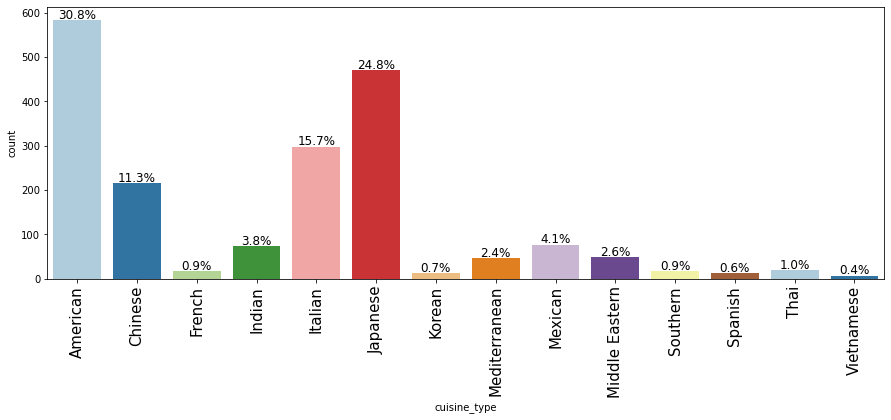

In [10]:
labeled_barplot(df,"cuisine_type", perc=True)

#### Observations:
* Customers mostly ordered from American (30.8%), Japanese (24.8%), and Italian (15.7%) restaurants. Combined they account for approximately 71.3% of all orders.
* Customers rarely ordered from Korean (0.7%), Spanish (0.6%), and Vietnamese (0.4%) restaurants.

#### Cost of the order

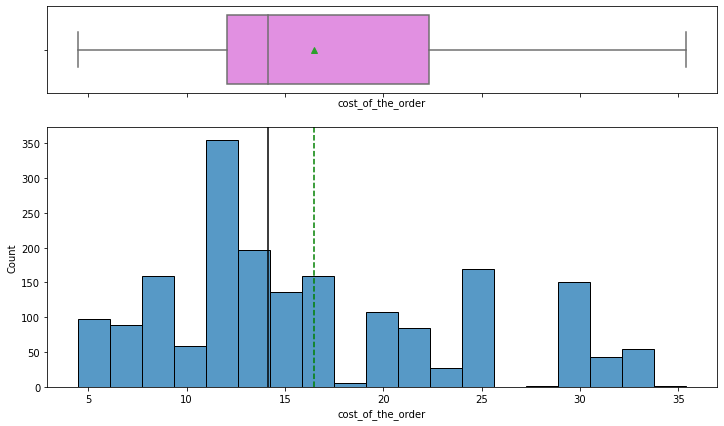

In [11]:
histogram_boxplot(df,"cost_of_the_order")

#### Observations:
* Cost of the order has a right skewed distribution.
* The mean is larger than the median
* There are no outliers

#### Day of the week

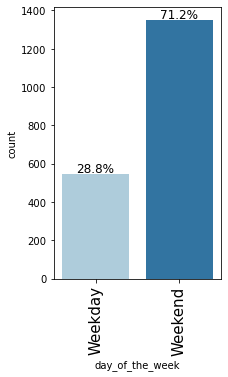

In [12]:
labeled_barplot(df,"day_of_the_week", perc=True)

#### Observations:
* 71.2% of orders are placed on the weekend.
* 28.8% of orders are placed on the weekday.

#### Rating

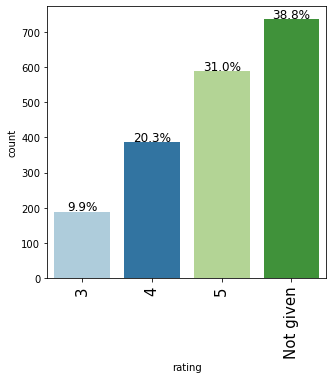

In [13]:
labeled_barplot(df,"rating",perc=True)

#### Observations:
* Most customers do not give rating. 38.8%. Gaining insights for why this is the case could be explored further analysis. 
* Most customers which gave a rating, gave a 5. 31.0%.
* The least common rating given to restaurants is a 3. 9.9%.
* None of the customers gave a rating of 1 or 2. It is very surprising that out of the 1898 orders, not one received a score. Gaining insights for why this is the case could be explored in further analysis. 

#### Food preparation time

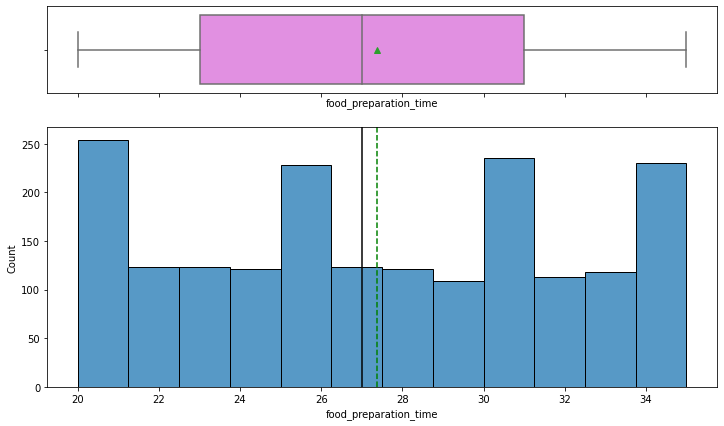

In [14]:
histogram_boxplot(df,"food_preparation_time")

#### Observations:
* Food preparation time has a uniform distribution.
* Food preparation time is slightly right skewed.
* The mean is larger than the median.
* There are no outliers.

#### Delivery time

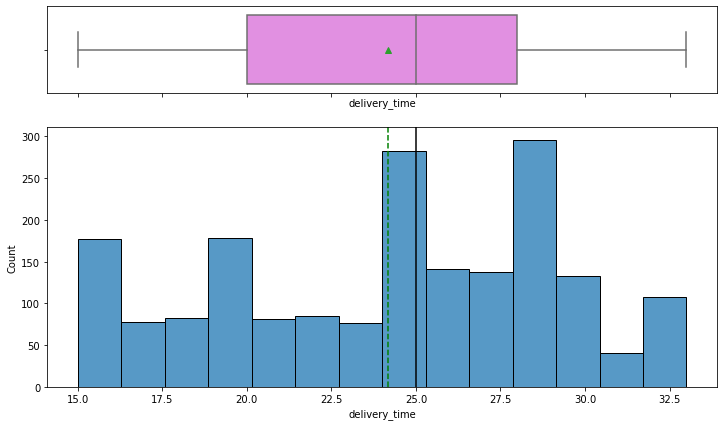

In [15]:
histogram_boxplot(df,"delivery_time")

#### Observations:
* Delivery time has a left skewed distribution.
* The mean is smaller than the median.
* There are no outliers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
#Finding the top 5 restaurants in terms of the number of orders received.
df["restaurant_name"].value_counts().head(10)

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants are Shake Shack (219 orders), The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders), and Parm (68 orders).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
#Using groupby() to group cuisine and day of the week together
df_groupby = df.groupby("cuisine_type")["day_of_the_week"]

In [18]:
df_groupby.value_counts()

cuisine_type           
American        Weekend    415
                Weekday    169
Chinese         Weekend    163
                Weekday     52
French          Weekend     13
                Weekday      5
Indian          Weekend     49
                Weekday     24
Italian         Weekend    207
                Weekday     91
Japanese        Weekend    335
                Weekday    135
Korean          Weekend     11
                Weekday      2
Mediterranean   Weekend     32
                Weekday     14
Mexican         Weekend     53
                Weekday     24
Middle Eastern  Weekend     32
                Weekday     17
Southern        Weekend     11
                Weekday      6
Spanish         Weekend     11
                Weekday      1
Thai            Weekend     15
                Weekday      4
Vietnamese      Weekend      4
                Weekday      3
Name: day_of_the_week, dtype: int64

#### Observations:
* American is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
#Finding the number of orders costing more than 20 dollars
df[df["cost_of_the_order"] > 20].shape

(555, 9)

In [20]:
df.shape

(1898, 9)

In [21]:
# Number of orders costing more than 20 dollars divided by total orders
round(((555 / 1898) * 100),1)

29.2

#### Observations:
* 29.2% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
round(df["delivery_time"].mean(),1)

24.2

#### Observations:
* The mean delivery time is 24.2 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
#Finding the number of returning customers
df["customer_id"].value_counts().head(20)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
Name: customer_id, dtype: int64

#### Observations:

###### The top 5 most frequent customers: 

* Customer ID 52832 made 13 orders
* Customer ID 47440 made 10 orders
* Customer ID 83287 made 9 orders
* Customer ID 250494 made 8 orders
* Customer ID 259341 made 7 orders
* Note Customers ID 82041, 65009, and 276192 also made 7 orders and could therefore be eligible for the discount voucher.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


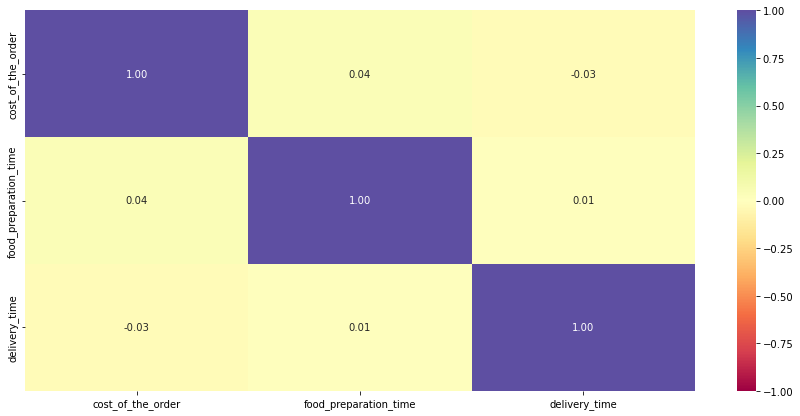

In [24]:
# Check for correlation among numerical variables
num_var = ["cost_of_the_order","food_preparation_time","delivery_time"]

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### Observations

* There does not seem to be a correlation between the any of the numerical values.

#### Cuisine type versus Cost of the order

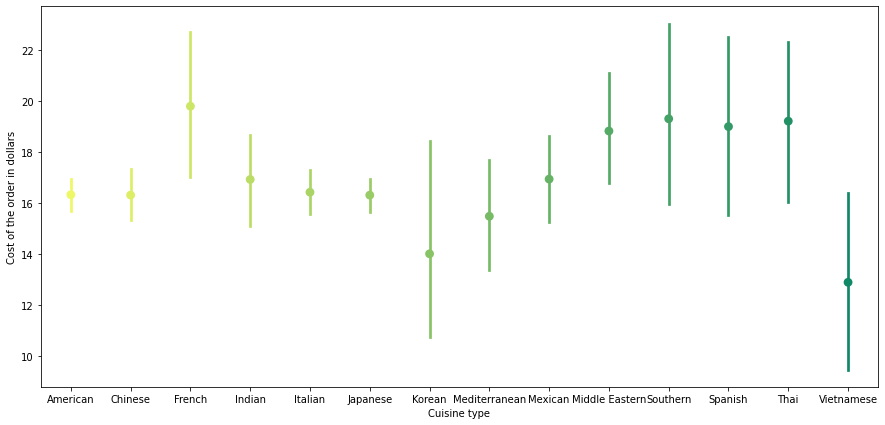

In [25]:
plt.figure(figsize=(15,7))
sns.pointplot(x="cuisine_type", y="cost_of_the_order", ci=95, data=df, palette="summer_r")
plt.ylabel("Cost of the order in dollars")
plt.xlabel("Cuisine type")
plt.show()

#### Observation

* The cost of the order differs depending on the food being ordered. 
* The cost of the order differs depending on the cuisine type. 
* Vietnamese and Korean cuisine have the lowest mean cost.
* French and Southern have the highest mean cost.
* Cuisine types such as French, Korean, Southern, Spanish, Thai, and Vietnamese have a wider confidence interval compared to other cuisine types. This means that the prices on the menu items vary more compared to the other cuisine types. 
* Cuisine types such as American, Chinese, Italian, and Japanese have a lower confidence interval compared to other cuisine types. This means that the prices on the menu items vary less compared to the other cuisine types.

#### Rating versus Cost of the order

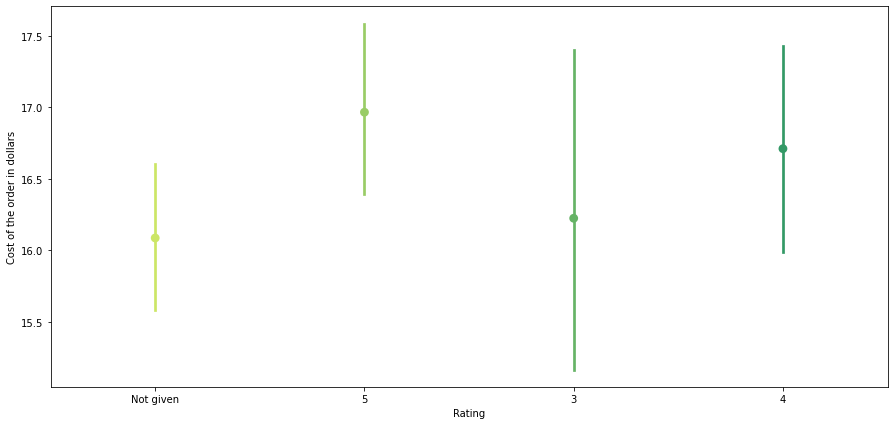

In [26]:
plt.figure(figsize=(15,7))
sns.pointplot(x="rating", y="cost_of_the_order", ci=95, data=df, palette="summer_r")
plt.ylabel("Cost of the order in dollars")
plt.xlabel("Rating")
plt.show()

#### Observation

* The mean cost of the order was highest for those which gave a rating of 5.
* The mean cost of the order was lowest for those which did not give a rating.
* The variability in cost of the order was widest for those which gave a rating of 3. This might suggest that customers that gave a rating of 3 was not influenced by the cost of the order. 
* Most customers which paid less than 16 dollars for the order either gave a rating of 3 or did not give a rating at all.

#### Cuisine type versus Food preparation time

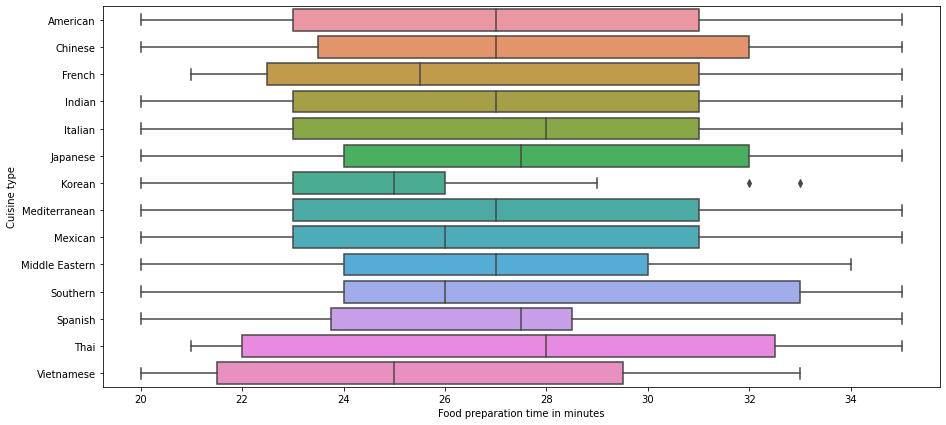

In [27]:
plt.figure(figsize=(15,7))           
sns.boxplot(df["food_preparation_time"],df["cuisine_type"])
plt.ylabel("Cuisine type")
plt.xlabel("Food preparation time in minutes")
plt.show()

#### Observations

* Food preparation time differs depending on the cuisine type.
* Cuisine types such as French, Mexican, and Southern have a right skew distribution.
* Cuisine types such as Korean, and Spanish have a left skew distrubution.
* Food preparation time for Korean food is the shortest. But there are a few outliers.
* interquartile range differs depending on the cuisine type.
* The interquartile range for Korean food is the smallest.

#### Day of week versus Delivery time

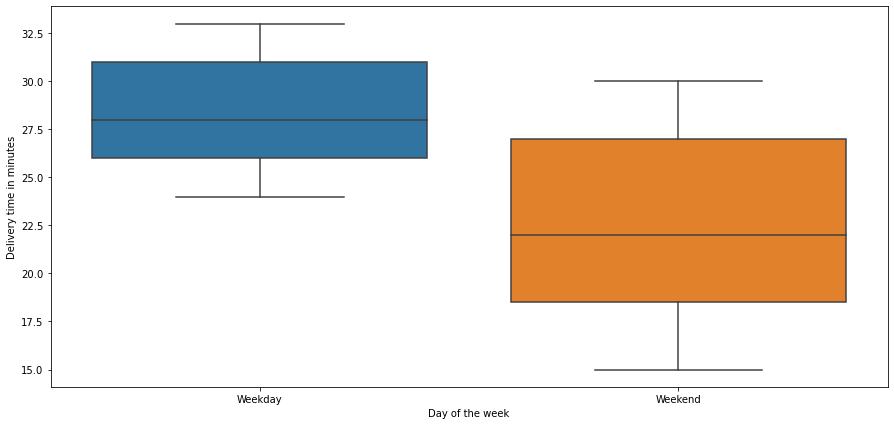

In [28]:
plt.figure(figsize=(15,7))           
sns.boxplot(df["day_of_the_week"],df["delivery_time"])
plt.ylabel("Delivery time in minutes")
plt.xlabel("Day of the week")
plt.show()

#### Observation

* Mean delivery time during the weekday is higher than the weekend. About 6 minutes longer compared to the weekend.
* The weekend has a wider interquartile range than the weekday.
* Both graphs have a right skewed distribution.
* Both graphs have no outliers.

#### Rating versus Delivery time

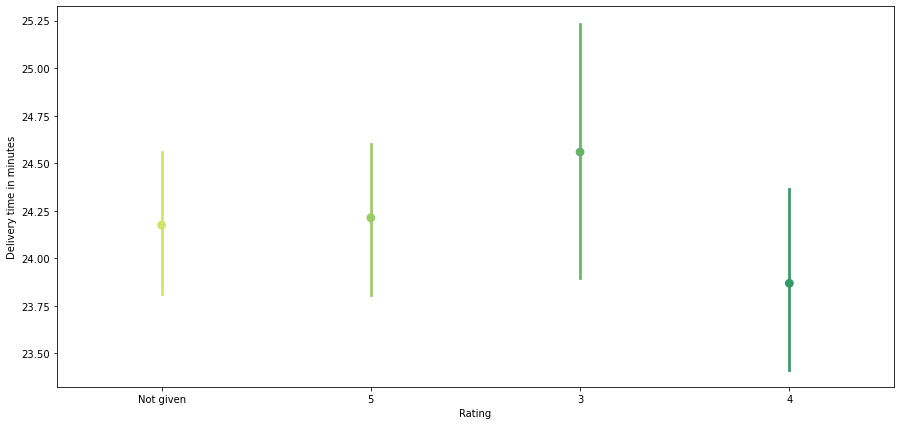

In [29]:
plt.figure(figsize=(15,7))
sns.pointplot(x="rating", y="delivery_time", ci=95, data=df, palette="summer_r")
plt.ylabel("Delivery time in minutes")
plt.xlabel("Rating")
plt.show()

#### Observations

* The mean delivery time is lowest for those who gave a 4 rating.
* The mean delivery time is highest for those who gave a 3 rating.
* The variability in delivery time was largest for those who gave a 3 rating.
* The variability in delivery time was lowest for those who did not give a rating.
* Most customers which had to wait more than 24.6 minutes were more likely to give a 3 rating. This might be because the food became cold.

#### Rating versus Food preparation time

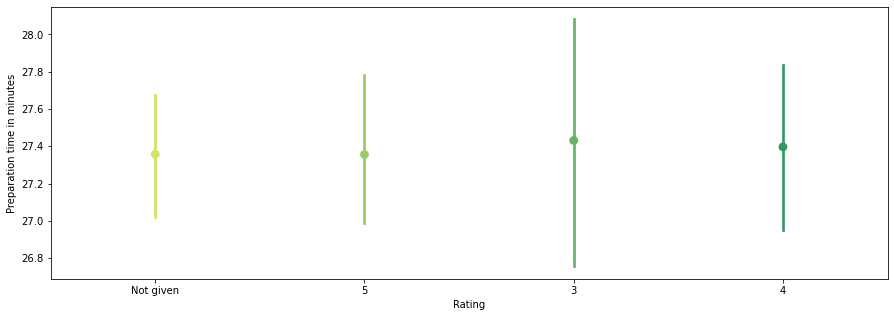

In [30]:
plt.figure(figsize=(15,5))
sns.pointplot(x="rating", y="food_preparation_time", ci=95, data=df, palette="summer_r")
plt.ylabel("Preparation time in minutes")
plt.xlabel("Rating")
plt.show()

#### Observations

* The mean food preparation time is highest for those who gave a 3 rating.
* The variability in food prepartion time was largest for those who gave a 3 rating.
* Food which was made in less than 27.0 minutes and more than 28.0 minutes were most likely to give a rating of 3. This might suggest that food which was made too quickly received a low rating due to the quality of the food. And food which took too long to make also received a low rating. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [31]:
#The rating "Not given" is not numeric and therefore cannot be used to answer this question.
df_rated = df[df["rating"] != "Not given"].copy()

In [32]:
#Convert column from object type to an integer type.
df_rated["rating"] = df_rated.rating.astype("int64")

In [33]:
#Used groupby() for the "restaurant name" and "rating" to calculate rating count and average rating.
df_rated_groupby = df_rated[["restaurant_name","rating"]].groupby("restaurant_name").agg(["count","mean"]).reset_index()

In [34]:
df_rated_groupby

restaurant_name rating          
                       count      mean
0          'wichcraft      1  5.000000
1           12 Chairs      2  4.500000
2     5 Napkin Burger      2  4.000000
3           67 Burger      1  5.000000
4             Alidoro      0       NaN
..                ...    ...       ...
173    Zero Otto Nove      1  4.000000
174              brgr      1  3.000000
175        da Umberto      1  5.000000
176  ilili Restaurant     13  4.153846
177         indikitch      2  4.500000

[178 rows x 3 columns]

In [35]:
#Find all restaurants with a rating count of more than 50.
df_rated_groupby[df_rated_groupby["rating","count"] > 50]

restaurant_name rating          
                                count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905

#### Observations:

#### These are the restaurants that fufill the promotional offer:
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
#Finding orders that cost more than 20 dollars.
df_25_orders = df[df["cost_of_the_order"] > 20]

In [37]:
df_25_orders.shape

(555, 9)

In [38]:
round((555/1898)*100,1)

29.2

In [39]:
#Finding orders that cost > 5 but no more than 20.
df_15_orders = df[(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"]<= 20)]

In [40]:
df_15_orders.shape

(1334, 9)

In [41]:
round((1334/1898)*100,1)

70.3

In [42]:
#Combining orders > 20 dollars and orders >5 dollars to find net revenue.
df_net_revenue = (df_25_orders["cost_of_the_order"].sum()*0.25) + (df_15_orders["cost_of_the_order"].sum()*0.15)

In [43]:
round(df_net_revenue,1)

6166.3

#### Observations:
* The company generated a net revenue of around 6166.30 dollars.
* About 29.2% of orders had a cost greater than 20 dollars.
* About 70.3% of orders had a cost between greater than 5 and 20 dollars.
* About 0.5% of orders did not include company charges.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
#Creating a new column in dataframe.
df["Total_Time"] = df["food_preparation_time"] + df["delivery_time"]

In [45]:
#Finding orders which took more than 60 minutes to get delivered.
df[df["Total_Time"] > 60].shape

(200, 10)

In [46]:
df.shape

(1898, 10)

In [47]:
# number of orders taking more than 60 minutes divided by total orders
round((200/1898)*100,1)

10.5

#### Observations:
* About 10.5% of orders took more than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
#First calculating mean delivery time for weekday.
df_weekday = df[df["day_of_the_week"] == "Weekday"]

In [49]:
round(df_weekday["delivery_time"].mean(),1)

28.3

In [50]:
# Calculating mean delivery time for weekend.
df_weekend = df[df["day_of_the_week"] == "Weekend"]

In [51]:
round(df_weekend["delivery_time"].mean(),1)

22.5

#### Observations:
* The mean delivery time during the weekends is 22.5 minutes
* The mean delivery time during the weekdays is 28.3 minutes
* The mean delivery time is 5.8 minutes slower during the weekday compared to the weekend. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


## Conclusion

We analyzed a dataset of different restaurants from New York using the FoodHub app. The dataset provided insights about customer satisfaction, delivery time, and customer preferences. 

We have been able to conclude that 

#### Cuisine Type
1. Customers mostly ordered from American (30.8%), Japanese (24.8%), and Italian (15.7%) restaurants. Combined they account for approximately 71.3% of all orders.
2. Customers rarely ordered from Korean (0.7%), Spanish (0.6%), and Vietnamese (0.4%) restaurants.

#### Orders
3. Most of orders are placed on the weekend. 71.2%.

#### Delivery time
4. The mean delivery time is 5.8 minutes slower during the weekday compared to the weekend. 
5. About 10.5% of orders took more than 60 minutes to get delivered.

#### Customer satisfcation
6. 38.8% of customers did not leave a rating.
7. Most customers which did give a rating, gave a 5. 31.0%.
8. There was no correlation between cost of the order, food preparation time, and delivery time.
9. Most customers which paid less than 16 dollars for the order either gave a rating of 3 or did not give a rating at all.
10. Most customers which had to wait more than 24.6 minutes for the food to be delivered, were more likely to give a lower rating of 3.

#### Cost and revenue
11. The cost of orders differs depending on the cuisine type.
12. The company generated a net revenue of around 6'166.30 dollars.

## Recommendation to business

1. Customer satisfaction is lower when food delivery takes too long. Produce more data on food delivery and build a model that can ensure quicker delivery. 
2. Customer satisfaction is lower when food is prepared too quickly and when food is very cheap. Ensure the app works with restaurants who prioritise quality over speed.
3. The demand during the weekend is higher. Delivery workers must be ensured during this time period. 
4. American, Japanese and Italian restaurants receive the most orders. Ensure that more of these types of restaurants use the app to meet growing demands.
 

##  Further Analysis

1. None of the customers gave a rating of 1 or 2. It is very surprising that out of the 1898 orders, not one received a score. Gaining insights for why this is the case could be explored in further analysis.
2. Most customers do not give rating. 38.8%. Gaining insights for why this is the case could be explored further analysis.
3. Deeper dive into customer satisfaction versus cuisine type. For instance finding out why some cuisine types are more popular than others will help to give more insights about which cuisine types to priorizie and promote.
4. Deeper dive into returning customers to gain better insights on customer satisfaction.